# 02 -- Digits MNIST - SciPy

## Victor Jose Novaes Pires

### 2019-03-07

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from scipy import __version__

print(f"SciPy version: {__version__}")

SciPy version: 1.2.1


In [6]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.2


In [7]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0


## MNIST dataset

In [8]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Flattening

In [10]:
X_train = np.asarray([X.flatten() for X in X_train])

X_train.shape

(60000, 784)

In [11]:
X_test = np.asarray([X.flatten() for X in X_test])

X_test.shape

(10000, 784)

In [12]:
y_train = y_train.reshape(-1, 1)

y_train.shape

(60000, 1)

In [13]:
y_test = y_test.reshape(-1, 1)

y_test.shape

(10000, 1)

### Feature scaling

In [14]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [15]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [16]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Dataset analysis and equations on: 01 -- Digits MNIST - NumPy

## Optimization

In [17]:
%%time

from scipy.optimize import minimize
import NNfromScratch as nnfs

hidden_layer_size = 25
Θ1 = nnfs.random_initializer([hidden_layer_size, (X_train.shape[1] + 1)], seed=42)
Θ2 = nnfs.random_initializer([len(classes), (hidden_layer_size + 1)], seed=42)
Θ1_start, Θ2_start = np.copy(Θ1), np.copy(Θ2)
λ = 1

res = minimize(nnfs.cost_and_gradients,
               np.concatenate([Θ1.reshape(-1), Θ2.reshape(-1)]),
               args=(X_train, y_train, λ, [Θ1.shape, Θ2.shape]),
               method='L-BFGS-B',
               jac=True,
               options={"maxiter": 10_000, "disp": True})

print(res, '\n')

      fun: 0.14086517627063297
 hess_inv: <19885x19885 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.44526530e-06, -4.91987796e-13, -2.53238441e-13, ...,
        2.72300958e-06,  1.22569736e-06,  8.54177847e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5936
      nit: 5650
   status: 0
  success: True
        x: array([ 9.63021484e-01, -2.95192678e-08, -1.51943064e-08, ...,
        1.54834687e-01, -7.57821978e+00, -1.10276954e+00]) 

CPU times: user 1h 9min, sys: 24min 31s, total: 1h 33min 32s
Wall time: 1h 7min 33s


In [18]:
print(f"\nCost started at {nnfs.cost(X_train, y_train, Θ1_start, Θ2_start, λ):,.2f}",
      f"and after {res.nfev} evaluations of the objective functions",
      f"and {res.nit} iterations it ended at {res.fun:,.2f}.")


Cost started at 6.87 and after 5936 evaluations of the objective functions and 5650 iterations it ended at 0.14.


In [19]:
Θ1_size = Θ1.shape[0] * Θ1.shape[1]

Θ1 = res.x[:Θ1_size].reshape(Θ1.shape)

Θ2 = res.x[Θ1_size:].reshape(Θ2.shape)

## Scores

### Training set

In [20]:
p_train = nnfs.predict(X_train, y_train, Θ1, Θ2)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 99.55%


In [21]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 59,729 out of 60,000 images.


In [22]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 271 out of 60,000 images.


### Test set

In [23]:
p_test = nnfs.predict(X_test, y_test, Θ1, Θ2)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 96.12%


In [24]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,612 out of 10,000 images.


In [25]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 388 out of 10,000 images.


## Correctly classified images

In [26]:
import matplotlib.pyplot as plt

def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {y[indices[i]][0]} <> Pred: {p[indices[i]][0]}", fontsize=12)
        ax.set_axis_off()

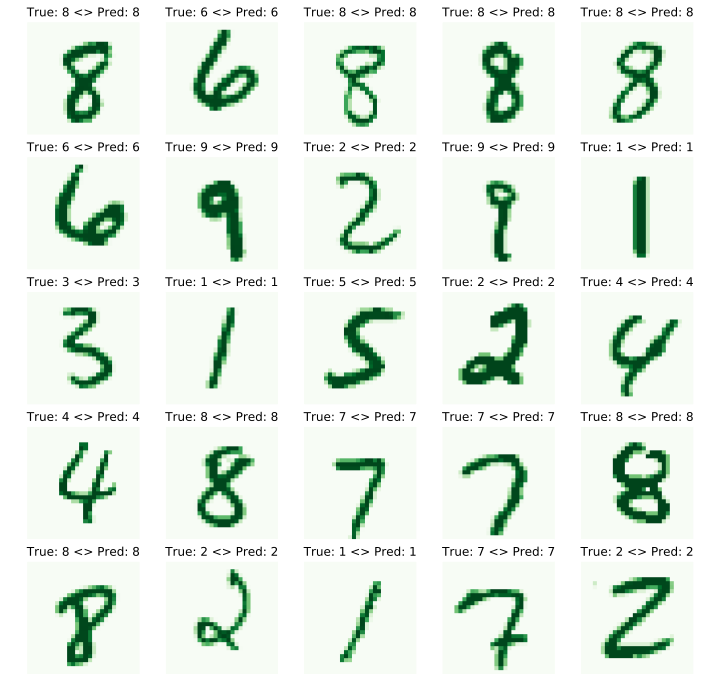

In [27]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

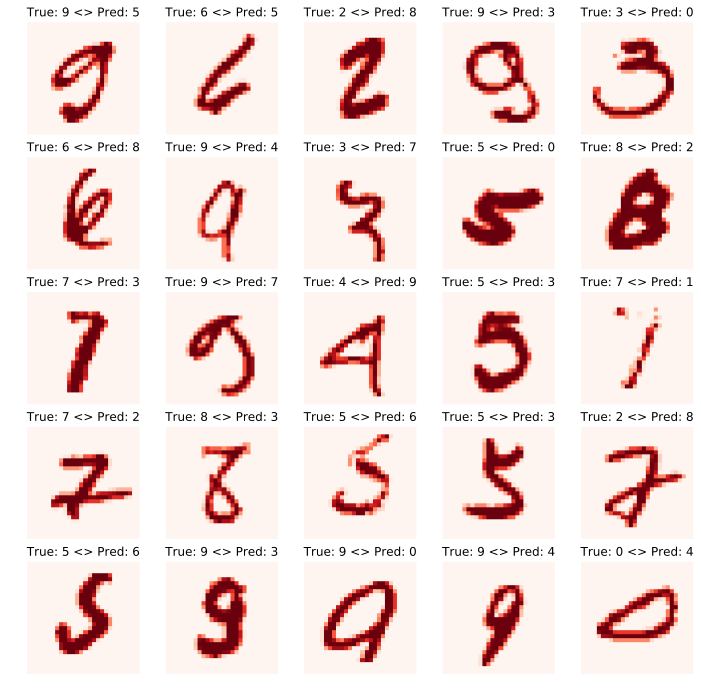

In [28]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')

## Hidden layers weights visualization

### First hidden layer

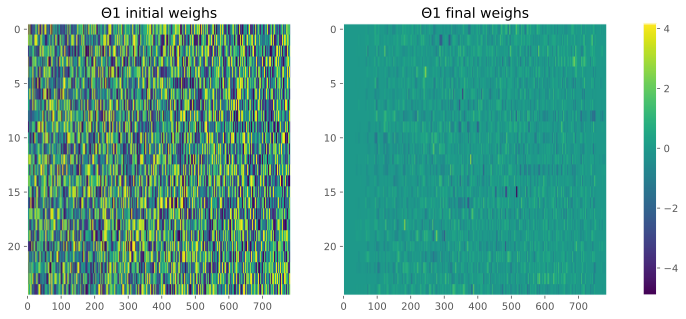

In [29]:
def plot_weights(weights, name):
    plt.style.use('ggplot')
    fig, ax_arr = plt.subplots(1,2, figsize=[13, 5])
    for ax, w, state, i in zip(ax_arr, weights, ['initial', 'final'], [1, 2]):
        last = ax.imshow(w, cmap='viridis', aspect='auto')
        ax.set_title(f"{name} {state} weighs", fontsize=14)
        ax.grid(False)
    fig.colorbar(last, ax=list(ax_arr))
    plt.show()


plot_weights([Θ1_start, Θ1], 'Θ1')

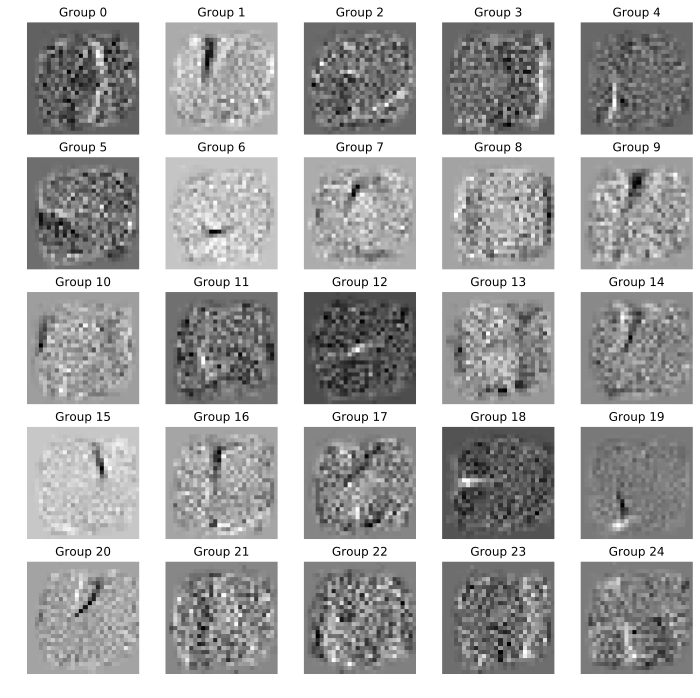

In [30]:
def plot_groups(Θ, group_size, num_groups):
    Θv = [Θ[:, 1:][i].reshape(group_size, group_size).T for i in range(num_groups)]
    num_rc = int(np.sqrt(num_groups))
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(Θv[i], cmap='gray')
        ax.set_title(f"Group {i}", fontsize=12)
        ax.set_axis_off()


plot_groups(Θ1, group_size=28, num_groups=hidden_layer_size)

### Second hidden layer

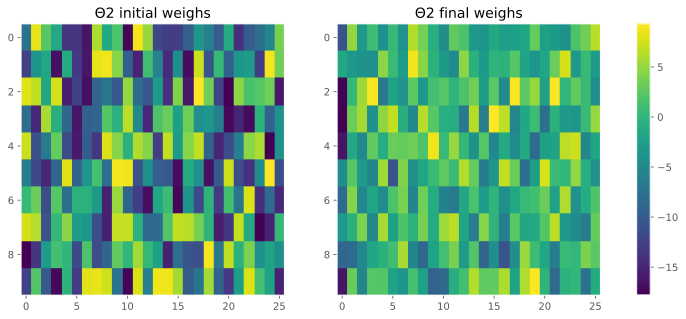

In [31]:
plot_weights([Θ2_start, Θ2], 'Θ2')

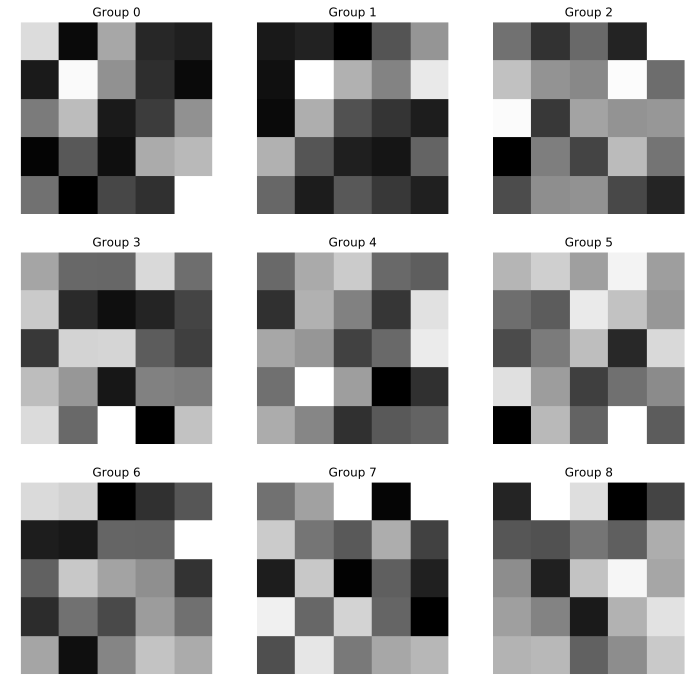

In [32]:
plot_groups(Θ2, group_size=int(np.sqrt(hidden_layer_size)), num_groups=9)